<a href="https://colab.research.google.com/github/254punchlinez/254punchlinez/blob/main/CAT_2_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD DATASET

In [44]:
import pandas as pd
voting=pd.read_csv('/content/Data science model 1.csv')
print("Shape of the dataset:",voting.shape)
voting.head()

Shape of the dataset: (28, 6)


,voter's_ID,audience,likes_and_shares,sentiment,time,candidate
0,1,adults,300,positive,12:44,A
1,2,teens,500,negative,4:50,B
2,3,children,23,neutral,3:44,A
3,4,children,400,positive,2:00,A
4,5,all,35,neutral,5:09,C


REPLACE

In [45]:
voting['candidate']=voting['candidate'].replace({'A':1.0,'B':2.0,'C':3})
voting['sentiment']=voting['sentiment'].replace({'positive ':3.0,'negative':4.0,'neutral':5})
voting['audience']=voting['audience'].replace({'adults':6.0,'teens':7.0,'children':8,'all':0})
print(voting)


    voter's_ID  audience  likes_and_shares  sentiment   time  candidate
0            1       6.0               300        3.0  12:44        1.0
1            2       7.0               500        4.0   4:50        2.0
2            3       8.0                23        5.0   3:44        1.0
3            4       8.0               400        3.0   2:00        1.0
4            5       0.0                35        5.0   5:09        3.0
5            6       6.0                67        5.0   6:00        1.0
6            7       6.0               340        4.0  11:00        3.0
7            8       7.0               200        3.0   4:40        3.0
8            9       7.0               450        3.0  10:23        3.0
9           10       8.0               320        3.0   5:34        2.0
10          11       7.0                34        4.0   1:45        1.0
11          12       0.0               456        3.0   8:34        2.0
12          13       0.0                45        5.0   5:45    

DIVIDE INTO INDEPENDENT AND DEPENDENT VARIABLE

In [46]:
import pandas as pd
voting=pd.read_csv('/content/Data science model 1.csv')
X=pd.DataFrame(voting[{'likes_and_shares','audience','sentiment'}])
y=pd.DataFrame(voting['candidate'])


<ipython-input-46-be0d6d6ebad5>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=pd.DataFrame(voting[{'likes_and_shares','audience','sentiment'}])


SPLIT INTO TRAIN AND TEST

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
voting=pd.read_csv('/content/Data science model 1.csv')
X=pd.DataFrame(voting['likes_and_shares'])
y=pd.DataFrame(voting['candidate'])
X_train,X_test,y_train,y_test,=train_test_split(X,y,test_size=0.35,random_state=42)


LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

PREDICT

In [49]:
y_pred=logr.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B'], dtype=object)

EVALUATE

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acs=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print('Accuracy Score: %.2f'%acs)
print('Classificatio Report')
print(cr)


Accuracy Score: 0.60
Classificatio Report
              precision    recall  f1-score   support

           A       0.75      1.00      0.86         3
           B       0.50      1.00      0.67         3
           C       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.42      0.67      0.51        10
weighted avg       0.38      0.60      0.46        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX

Text(0.5, 1.0, 'Social Media Voting')

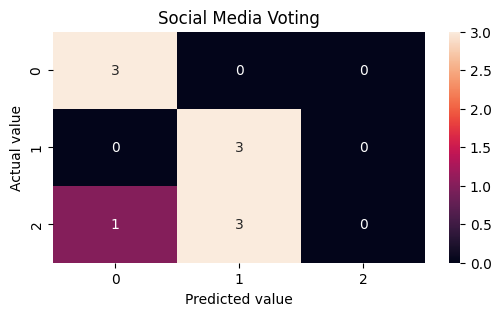

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,3))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Social Media Voting')



PREDICTING

In [53]:
logr.predict([[23]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['C'], dtype=object)

SAVING

In [55]:
import joblib
joblib.dump(logr,'SOCIAL MEDIA.pkl')

['SOCIAL MEDIA.pkl']